# Episode 05: Scoping of Proofs of concepts

TODO 

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

In [ ]:
# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [1]:
from episode04 import clues2x2, solution2x2, clues5x5s, solution5x5s
from episode04 import Puzzle, BoardMark, SolvedNonoGameEngine

import numpy as np

In [166]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [167]:
solution2x2

array([[1, 0],
       [1, 1]])

# 2. Try-and-error process

Having an idea from scratch is difficult.

The contract with the platyer for Nonograms is that they always have 1 solution. Let's say we know that there is a solution. We can try different values for each cell until the board is solved.

Even if this process is probably not what we want, it will help undestand what we need to solve the puzzle. 

In addition, it make sense in AI. Some algorithms, especially in Reinforcement Learning, work by learning from try-and-error process. They are given the goal to keep errors to a minimulm.

What could be the try-and-error process ?

For each cell, I know that it could be black or filler. 

We need some game engine to decide whether the action is valid or not according to be solution it knows already. 

Now, let's loop over the problem space

## 2.2. Experiments

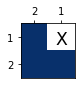

error_count:1


In [2]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2)
board2x2 = game2x2.board

for row in range(puzzle2x2.height):
    for col in range(puzzle2x2.width):
        game2x2.play(row, col, BoardMark.BLACK)

game2x2.show()
print(f"error_count:{game2x2.errors}")

Voila!

I agree that this algorithm is pretty dump. The percentage of errors goes up very rapidly and exceed what the game will accept (usually 3 errors). On the 5x5 board it took 11 errors to solve 25 cells.

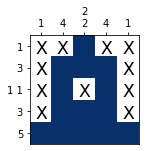

error_count:11


In [3]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s)

for row in range(puzzle5x5s.height):
    for col in range(puzzle5x5s.width):
        game5x5s.play(row, col, BoardMark.BLACK)

game5x5s.show()
print(f"error_count:{game5x5s.errors}")

# 2.3  Wrap up

What works:
- it is really simple to design and implement
- no computation, no headache with split blocks

Limitation:
- requires that the solution is known beforehand
- roughly 50% error rate. It depends on the proportion of blacks and fillers,  and whether blacks or fillers are checked for validity